# Additional Results

### Why Classification and not Regression of Runtimes?

Regression with bad performance:

* RandomForestRegressor

```
                          count 	mean 	std 	min 	25% 	50% 	75% 	max
mean_squared_error 	  16.0 	3.724295e+06 	1.348277e+06 	1.530577e+06 	2.793769e+06 	3.589350e+06 	4.619467e+06 	6.145517e+06
mean_absolute_error       16.0 	9.573562e+02 	2.972076e+02 	3.186824e+02 	7.835979e+02 	9.661874e+02 	1.153120e+03 	1.448095e+03
```

* MLPRegressor

```
                          count 	mean 	std 	min 	25% 	50% 	75% 	max
mean_squared_error 	  16.0 	5.176544e+06 	2.387069e+06 	2.602794e+06 	3.239445e+06 	4.572074e+06 	6.156944e+06 	1.070547e+07
mean_absolute_error 	  16.0 	1.284299e+03 	3.905736e+02 	8.193949e+02 	9.703069e+02 	1.184859e+03 	1.467734e+03 	2.073955e+03
```

### Selection of Classification Model (supervised prediction)

**Evaluation Setup**

* 28 solvers
* Each time one of the 28 solvers treated as new solver
* 28 times stratified 5-fold cross-validation
* Grid search on a set of manual configs for each model to optimize validation set performance
* 20% hold-out test set
* Avg and std of 28 MCC scores on test set

**Timeout-Prediction**

| MCC avg (std) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Training Time &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Base &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Base and Runtime &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Lognorm-Base and Transformed Runtimes    |
|:----------------------|:---------|:----------------|:------------------|:--------------------------------------|
| Stacking (qda,rf)     | medium   | 0.6513 (0.0458) | 0.8481 (0.0422)   | 0.9527 (0.0292)                       |
| QuadraticDA           | fast     | 0.2593 (0.1310) | 0.5994 (0.1410)   | 0.9290 (0.0339)                       |
| RandomForest          | medium   | 0.6607 (0.0547) | 0.8510 (0.0356)   | 0.8530 (0.0479)                       |
| AdaBoost (DTree)      | medium   | 0.5412 (0.0612) | 0.8304 (0.0467)   | 0.8384 (0.0444)                       |
| AdaBoost (LogReg)     | slow     | 0.1862 (0.0751) | 0.1863 (0.0795)   | 0.8158 (0.0985)                       |
| DecisionTree          | fast     | 0.5980 (0.0423) | 0.8025 (0.0941)   | 0.8059 (0.0707)                       |
| LogisticRegression    | medium   | 0.2031 (0.0728) | 0.1970 (0.0721)   | 0.8052 (0.1018)                       |
| kNN-Classifier        | fast     | 0.5108 (0.0387) | 0.5109 (0.0386)   | 0.7885 (0.1521)                       |
| MLPClassifier         | slow     | 0.1293 (0.0718) | 0.1441 (0.0628)   | 0.7760 (0.1408)                       |
| RBF SVC               | slow     | 0.0595 (0.0554) | 0.0595 (0.0554)   | 0.7757 (0.2149)                       |
| Naive Bayes           | fast     | 0.1173 (0.0872) | 0.6767 (0.1507)   | 0.7306 (0.1394)                       |
| RBF GaussianPC        | fast     | 0.2211 (0.0568) | 0.2323 (0.0600)   | 0.5687 (0.1591)                       |

**k=3**

| MCC avg (std) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Training Time &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Transformed Base and Runtime &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | + other Clusters &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
|:----------------------|:---------|:----------------|:------------------|
| Stacking (qda,rf)     | medium   | 0.7464 (0.0497) | 0.8380 (0.0634)   |
| QuadraticDA           | fast     | 0.6903 (0.0607) | 0.7738 (0.0459)   |
| RandomForest          | medium   | 0.7116 (0.0385) | 0.7841 (0.0469)   |

**k=4**

| MCC avg (std) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Training Time &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Transformed Base and Runtime &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | + other Clusters &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
|:----------------------|:---------|:----------------|:------------------|
| Stacking (qda,rf)     | medium   | 0.6562 (0.0538) | 0.7366 (0.0377)   |
| QuadraticDA           | fast     | 0.6007 (0.0765) | 0.6872 (0.0469)   |
| RandomForest          | medium   | 0.6033 (0.0455) | 0.6828 (0.0527)   |

**k=5**

| MCC avg (std) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Training Time &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Transformed Base and Runtime &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | + other Clusters &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
|:----------------------|:---------|:----------------|:------------------|
| Stacking (qda,rf)     | medium   | 0.5835 (0.0615) | 0.6396 (0.0553)   |
| QuadraticDA           | fast     | 0.5508 (0.0669) | 0.5881 (0.0912)   |
| RandomForest          | medium   | 0.5420 (0.0459) | 0.5895 (0.0475)   |

### Confusion Matrix of Stacking model (supervised prediction)

* Stacking model, confusion matrix, 2 clusters (no timeout / timeout)

```
                Predicted label
                  0     1
True label  0  50.45  0.15
            1   3.24 46.16
```

* Stacking model, confusion matrix, 3 clusters (top-tier, mid-tier, timeout)

```
                Predicted label
                 0     1     2
True label  0  21.29  3.43  0.46
            1   2.88 22.29  0.22
            2   0.61  1.35 47.47
```

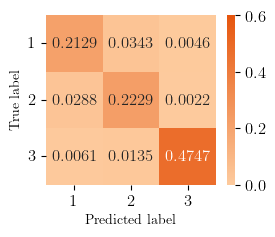

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

cmap = sns.blend_palette(['#fdca9d','#e6550d'], n_colors=6, as_cmap=True, input='hex')
# cmap = sns.color_palette("crest", as_cmap=True)

fs = 12

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

two_labels_cm = pd.DataFrame(np.array([
    [0.5045, 0.0015],
    [0.0324, 0.4616],
]), range(1, 3), range(1, 3))
three_labels_cm = pd.DataFrame(np.array([
    [0.2129,0.0343,0.0046],
    [0.0288,0.2229,0.0022],
    [0.0061,0.0135,0.4747],
]), range(1, 4), range(1, 4))

plt.figure(figsize=(2.75, 2.2))
sns.heatmap(three_labels_cm, annot=True, cmap=cmap, annot_kws={"size": 12}, fmt='.4f', vmin=0, vmax=0.6, cbar=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.yticks(rotation=0)
plt.savefig("plots/cm3labels.pdf")
plt.show()

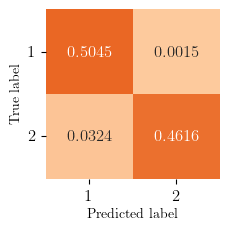

In [2]:
plt.figure(figsize=(2.25, 2.2))
sns.heatmap(two_labels_cm, annot=True, cmap=cmap, annot_kws={"size": 12}, fmt='.4f', vmin=0, vmax=0.6, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.yticks(rotation=0)
plt.savefig("plots/cm2labels.pdf")
plt.show()

### Ranking with Discretization

* Correct ranking pairs in table below: 97.45%
* Max. difference between wrong pairs 0.11
* Spearman correlation of PAR2 and Discrete rank: 0.9862

In [3]:
import pickle
import numpy as np
import pandas as pd

with open("../al-for-sat-solver-benchmarking-data/pickled-data/anni_final_df.pkl", "rb") as file:
    anni_final_df: pd.DataFrame = pickle.load(file)
    
#print(ifilter)
par2_ranking = []
for i, x in enumerate(sorted(zip(
    np.mean(anni_final_df.replace([np.inf, np.nan], 2 * 5000), axis=0),
    anni_final_df.columns
))):
    par2_ranking.append((i + 1, x[0], x[1]))
    #print(f"{(i+1):2}  {x[0]:.3f}  {x[1]}")
#print()
    
import pickle
import numpy as np
import pandas as pd
from typing import List, Tuple


def min_log_dist(i: List[float], j: List[float]) -> float:
    fst = np.log1p(i)
    snd = np.log1p(j)
    return np.min(snd) - np.max(fst)


def merge_closest_intervals(
    train_solvers: List[str], runtimes_df: pd.DataFrame, n_intervals=2
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """ Hierarchical merging of the runtimes into clusters.

    Args:
        train_solvers (List[str]): The list of known solvers.
        runtimes_df (pd.DataFrame): The runtimes to cluster.
        n_intervals (int, optional): The number of labels to
        cluster the runtime into. Defaults to 2.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: A tuple of cluster labels
        and the boundaries between the labels.
    """

    merge_runtimes_df = runtimes_df[train_solvers].replace(
        [-np.inf, np.inf, np.nan], 0).astype(dtype=np.int8).copy()
    boundaries = {}

    for idx, (pd_index, instance) in enumerate(list(runtimes_df[train_solvers].iterrows())):
        if np.all(np.isinf(instance)):
            merge_runtimes_df.iloc[idx, :] = n_intervals

            # All solvers have time-out
            decision_boundaries = [
                np.nan,
                np.nan,
            ]
        else:
            actual_n_intervals = min(n_intervals, np.unique(instance).shape[0])
            unique_vals = list(np.sort(np.unique(instance)))
            if unique_vals[-1] == np.inf:
                del unique_vals[-1]
            intervals = [[i] for i in unique_vals]

            # Function to find the smallest distance between neighboring intervals
            def find_smallest_dist_neighbors(intervals):
                min_val = -1
                min_idx = -1
                idx = 0
                for i, j in zip(intervals[:-1], intervals[1:]):
                    val = min_log_dist(i, j)
                    if min_val == -1 or val < min_val:
                        min_val = val
                        min_idx = idx
                    idx += 1
                return min_idx, min_val

            # Repeat merging until desired number of intervals reached
            def merge_recursive(intervals):
                if len(intervals) <= actual_n_intervals:
                    return intervals
                else:
                    min_idx, min_val = find_smallest_dist_neighbors(intervals)
                    intervals[min_idx] += intervals[min_idx + 1]
                    del intervals[min_idx + 1]
                    return merge_recursive(intervals)

            # Compute clustering
            intervals = merge_recursive(intervals)
            curr_cluster_id = 0
            value_cluster_map = {np.inf: n_intervals}
            for interval in intervals:
                for value in interval:
                    value_cluster_map[value] = curr_cluster_id
                curr_cluster_id += 1

            # Compute boundaries of cluster labels
            sorted_labels = sorted(value_cluster_map.items())
            decision_boundaries = []
            for ((val1, int1), (val2, int2)) in zip(sorted_labels[:-1], sorted_labels[1:]):
                if int1 + 1 == int2:
                    # All cluster labels exist, use mean log distance as boundary
                    log_val1 = np.log1p(val1)
                    log_val2 = np.log1p(val2) if not np.isinf(
                        val2) else np.log1p(5000.0)
                    log_center = log_val1 + (log_val2 - log_val1) / 2
                    decision_boundaries.append(np.exp(log_center) - 1)
                elif int1 + 2 == int2:
                    # Only one solver does not time-out, log-divide space for boundaries
                    log_val1 = np.log1p(val1)
                    log_val2 = np.log1p(val2) if not np.isinf(
                        val2) else np.log1p(5000.0)
                    log_center = log_val1 + (log_val2 - log_val1) / 3
                    decision_boundaries.append(np.exp(log_center) - 1)
                    log_center = log_val1 + 2 * (log_val2 - log_val1) / 3
                    decision_boundaries.append(np.exp(log_center) - 1)

            # Output clusters for row
            merge_runtimes_df.iloc[idx, :] = instance.apply(
                lambda i: value_cluster_map[i])

        # Set decision boundary range
        boundaries[pd_index] = decision_boundaries

    return merge_runtimes_df, pd.DataFrame.from_dict(boundaries).transpose()


label_ranking = []
cluster_labels, b = merge_closest_intervals(anni_final_df.columns, anni_final_df)

#print(ifilter)
for i, x in enumerate(sorted(zip(
    np.mean(
        np.where(cluster_labels == 2, 4, cluster_labels),
        axis=0
    ),
    anni_final_df.columns
))):
    label_ranking.append((i + 1, x[0], x[1]))
    #print(f"{(i+1):2}  {x[0]:.3f}  {x[1]}")
#print()
#print(np.count_nonzero(
#    np.array([x[2] for x in label_ranking[ifilter]])
#    == np.array([x[2] for x in par2_ranking[ifilter]])) / 16)
    
def ranking_comp():
    ranking = []
    for (i, par2, solver1), (_, label_rank, solver2) in zip(par2_ranking, label_ranking):
        ranking.append((i, par2, float(f"{par2:.2f}"), solver1, label_rank, float(f"{label_rank:.4f}"), solver2))

    return pd.DataFrame.from_records(
        ranking, columns=[
            "rank", "par2", "par2_trunc", "par2_solver",
            "label_rank", "label_rank_trunc", "label_rank_solver"], index="rank")

ranking_anni = ranking_comp()
ranking_anni

,par2,par2_trunc,par2_solver,label_rank,label_rank_trunc,label_rank_solver
rank,,,,,,
1,2808.131702,2808.13,Kissat_MAB_ESA,1.171666,1.1717,Kissat_MAB_ESA
2,2812.931160,2812.93,kissat-sc2022-bulky,1.183173,1.1832,kissat-sc2022-bulky
3,2835.247538,2835.25,ekissat-mab-gb-db,1.186191,1.1862,ekissat-mab-gb-db
4,2835.594988,2835.59,Kissat_MAB_UCB,1.186757,1.1868,Kissat_MAB_UCB
5,2836.915263,2836.92,kissat_inc,1.186757,1.1868,kissat_inc
6,2845.189361,2845.19,ekissat-mab-db-v1,1.192605,1.1926,ekissat-mab-db-v1
7,2846.732671,2846.73,Kissat_MAB_MOSS,1.192982,1.1930,Kissat_MAB_MOSS
8,2857.666290,2857.67,Kissat_MAB-HyWalk,1.194680,1.1947,Kissat_MAB-HyWalk
9,2869.454962,2869.45,kissat-sc2022-light,1.199774,1.1998,kissat-sc2022-light


### Significance of Rankings

* Amount of significant solver pairs (Wilcoxon signed-rank, 5% alpha):

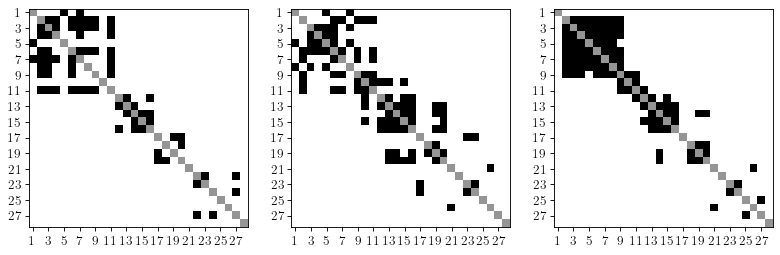

White = Significant Difference

Amount of significant pairs:
anni_seq: 684/756 = 0.9048
timeout: 660/756 = 0.8730
k=3: 662/756 = 0.8757
k=4: 662/756 = 0.8757
k=5: 662/756 = 0.8757


In [4]:
from itertools import product
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

fs = 12

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

def plot_significance(clustering, title=None, axis=None, alpha=0.05, bottom=True, first=False):
    solvers = list(clustering.columns)
    significance_matrix = np.zeros((len(solvers), len(solvers)), dtype=np.int8)
    sig, non_sig = 0, 0
    
    for (i, sa), (j, sb) in product(enumerate(solvers), enumerate(solvers)):
        if i == j:
            significance_matrix[i, j] = 0
        elif wilcoxon(
            clustering[sa].to_numpy(),
            clustering[sb].to_numpy()
        ).pvalue < alpha:
            sig += 1
            significance_matrix[i, j] = -1
        else:
            non_sig += 1
            significance_matrix[i, j] = 1
    
    if axis is not None:
        new_solver_order = np.array([
            6, 24, 18, 8, 26, 17, 7, 5, 25, 23, 21, 9, 15, 22, 3,
            2, 16, 27, 0, 1, 19, 11, 10, 14, 13, 20, 12, 4
        ], dtype=int)
        
        axis.imshow(significance_matrix[new_solver_order, :][:, new_solver_order], cmap="Greys")

        # old
        # 0,  'CaDiCaL_DVDL_V1',
        # 1,  'CaDiCaL_DVDL_V2',
        # 2,  'CadicalReorder',
        # 3,  'Cadical_ESA',
        # 4,  'IsaSAT',
        # 5,  'Kissat_MAB-HyWalk',
        # 6,  'Kissat_MAB_ESA',
        # 7,  'Kissat_MAB_MOSS',
        # 8,  'Kissat_MAB_UCB',
        # 9,  'Kissat_adaptive_restart',
        # 10, 'LSTech_Maple',
        # 11, 'LStech-Maple-HyWalk',
        # 12, 'MapleLCMDistChrBt-DL-v3',
        # 13, 'SLIME-SC-2022',
        # 14, 'SLIME-SC-2022-beta',
        # 15, 'SeqFROST-NoExtend',
        # 16, 'cadical_rel_Scavel',
        # 17, 'ekissat-mab-db-v1',
        # 18, 'ekissat-mab-gb-db',
        # 19, 'glucose-reboot',
        # 20, 'hCaD_V1-psids',
        # 21, 'hKis-unsat',
        # 22, 'kissat-els-v1',
        # 23, 'kissat-els-v2',
        # 24, 'kissat-sc2022-bulky',
        # 25, 'kissat-sc2022-light',
        # 26, 'kissat_inc',
        # 27, 'kissat_relaxed'
        
        if bottom:
            # axis.set_title(title, fontsize=fs)
            # axis.set_xticks(ticks=range(len(solvers)), labels=[
            #     f"{i+1}_{s}"
            #     for i, s in enumerate(solvers)
            # ], rotation=90)
            axis.set_xticks(ticks=range(0, len(solvers), 2), labels=range(1, len(solvers)+1, 2))
            axis.set_yticks(ticks=range(0, len(solvers), 2), labels=range(1, len(solvers)+1, 2))
        elif first:
            axis.set_yticks(ticks=range(len(solvers)), labels=[
                f"{i+1}_{s}"
                for i, s in enumerate(solvers)
            ])
            axis.set_xticks(ticks=range(0, len(solvers), 2), labels=range(1, len(solvers)+1, 2))
        else:
            axis.set_xticks(ticks=range(0, len(solvers), 2), labels=range(1, len(solvers)+1, 2))
            axis.set_yticks(ticks=range(0, len(solvers), 2), labels=range(1, len(solvers)+1, 2))
            
    return sig, non_sig, significance_matrix

figure, axis = plt.subplots(1, 3, figsize=(12, 6), dpi=80)
#figure.tight_layout(pad=2)
sig, non_sig = 0, 0
s1, n1, _ = plot_significance(anni_final_df.replace(np.inf, 10000.0), "anni_seq", axis[0])
s2, n2, _ = plot_significance(cluster_labels.where(cluster_labels == 2, 0).where(cluster_labels == 0, 1), "timeout", axis[1])
s3, n3, _ = plot_significance(cluster_labels, "k=3", axis[2]) 
s4, n4, _ = plot_significance(cluster_labels, "k=4", None) 
s5, n5, _ = plot_significance(cluster_labels, "k=5", None) 
plt.show()

print("White = Significant Difference")
print()
print("Amount of significant pairs:")
print(f"anni_seq: {s1}/{s1+n1} = {s1/(s1+n1):.4f}")
print(f"timeout: {s2}/{s2+n2} = {s2/(s2+n2):.4f}")
print(f"k=3: {s3}/{s3+n3} = {s3/(s3+n3):.4f}")
print(f"k=4: {s4}/{s4+n4} = {s4/(s4+n4):.4f}")
print(f"k=5: {s5}/{s5+n5} = {s5/(s5+n5):.4f}")

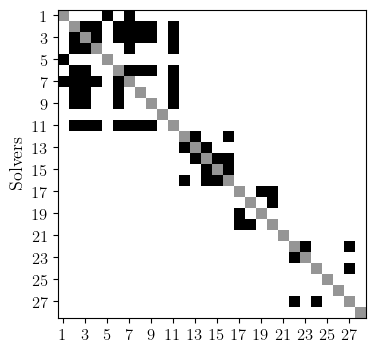

In [5]:
figure, axis = plt.subplots(1, 1, figsize=(5, 4))
plot_significance(anni_final_df.replace(np.inf, 10000.0), "anni_seq", axis)
plt.ylabel("Solvers", fontsize=13)
plt.savefig("plots/par2sigdiff.pdf")
plt.show()

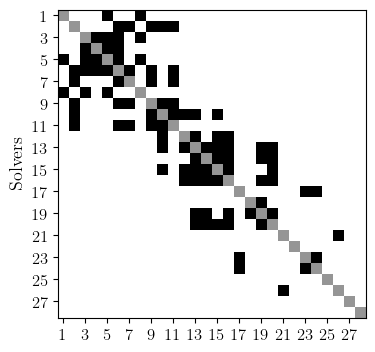

In [6]:
figure, axis = plt.subplots(1, 1, figsize=(5, 4))
plot_significance(cluster_labels.where(cluster_labels == 2, 0).where(cluster_labels == 0, 1), "timeout", axis)
plt.ylabel("Solvers", fontsize=13)
plt.savefig("plots/timeoutsigdiff.pdf")
plt.show()

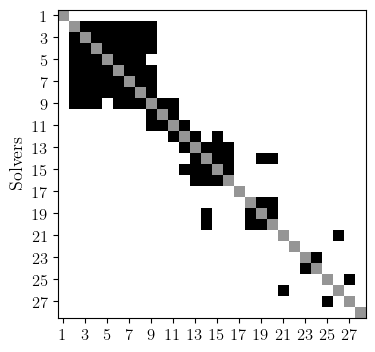

In [7]:
figure, axis = plt.subplots(1, 1, figsize=(5, 4))
plot_significance(cluster_labels, "k=3", axis)
plt.ylabel("Solvers", fontsize=13)
plt.savefig("plots/s3sigdiff.pdf")
plt.show()

### Benchmarks Selected

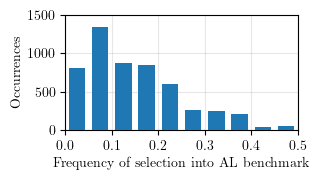

In [8]:
import matplotlib.pyplot as plt

fs = 10
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("pgf", texsystem="pdflatex")
plt.rc("savefig", bbox="tight")

plt.rc("xtick", labelsize=fs)
plt.rc("ytick", labelsize=fs)

plt.figure(figsize=(3, 1.5))
plt.grid(alpha=0.3, zorder=1)
plt.bar([
    0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475
], [811, 1342,  867,  851,  598,  260,  254,  212,   43,   58], width=0.035, zorder=5)
plt.xlim(0.0, 0.5)
plt.ylim(0, 1500)
plt.xlabel("Frequency of selection into AL benchmark")
plt.ylabel("Occurrences")
plt.savefig("plots/instoccs.pdf")
plt.show()

```
hash                                    freq            family 		
90fd3ab118c483a7d99707384c6c6c0a 	0.571429 	random
23a92c04ee9248308a18d6a44e5d15f0 	0.558442 	battleship
5aacd7fd4850b3712de14275906f1e29 	0.558442 	mosoi-289
d08c5fac67a7490e7f976dc07a891148 	0.551948 	pigeon-hole
3e04d7740237fb695f4b86ab0cf25a6d 	0.551948 	mosoi-289
57f34c7f226121206e07b7219879838d 	0.542208 	planning
1169b7c01112d97a6835d259052284ba 	0.538961 	planning
d35caf50ac810de6ae2693995894a629 	0.538961 	battleship
c3cc6d7dc2f972fa2d8b4830f230aacf 	0.535714 	genurq
c66167837eaad5a6ddc6ee40fa77488f 	0.535714 	pigeon-hole
81fe63cbee3d00cdb5edd8d48dd9c194 	0.535714 	clique-coloring
e8ee20b7aac3678ccee57a5ae898882c 	0.535714 	genurq
c0ee301a9bae7b5ff51d87854d89d549 	0.532468 	clique-coloring
149295422d7a647d48da377e0a4caea2 	0.532468 	pigeon-hole
11ba9953b9ae8475f05de36bfd6ec21f 	0.532468 	graph-coloring
d2b4a9ea1313121cf1c9c7f420028aea 	0.529221 	clique-coloring
995e7dba6337cfba9ef882945876252b 	0.529221 	planning
6459a34b91aa3bc54a3c587579b1ac95 	0.529221 	planning
681ec30b9f3f0ffd60b8f14231508ffc 	0.529221 	planning
1ac3aaccb392d349f2982f2bda21fb5a 	0.529221 	fpga-routing
```